# Hierarchical Tree Clustering

In [13]:
import matplotlib.pyplot as plt

In [14]:
import pandas as pd
df = pd.read_csv('dataset1.csv')

In [15]:
df.shape

(768, 9)

**Preparación de los datos**

In [16]:
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values

**Cálculo del enlazado del clustering jerárquico**

Se utiliza la función linkage para calcular el dendrograma jerárquico con el método de enlace completo y la métrica euclidiana.

In [17]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values,
                       method='complete',
                       metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=[f'cluster {(i + 1)}' for i in 
                    range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,132.0,247.0,2.872609,2.0
cluster 2,192.0,637.0,3.586227,2.0
cluster 3,432.0,608.0,3.834006,2.0
cluster 4,606.0,735.0,4.240072,2.0
cluster 5,157.0,601.0,4.244632,2.0
...,...,...,...,...
cluster 763,1513.0,1528.0,217.547871,540.0
cluster 764,1525.0,1530.0,295.941075,690.0
cluster 765,1524.0,1529.0,400.971173,75.0
cluster 766,1531.0,1532.0,614.119125,765.0


Como se puede observar, se tiene una matriz de 767 filas y 4 columnas, donde cada fila describe un paso en la unión de clusters, cuyo valor más importante es el obtenido de la columna 'distance', la cual muestra qué tan similares son los clusters unidos en cada paso.

**Visualización de los clusters en un dendrograma**

Se crea un dendrograma que muestra visualmente cómo las características se agrupan jerárquicamente, lo que facilita la identificación del número óptimo de clusters y muestra las distancias entre cada elemento y los clusters.

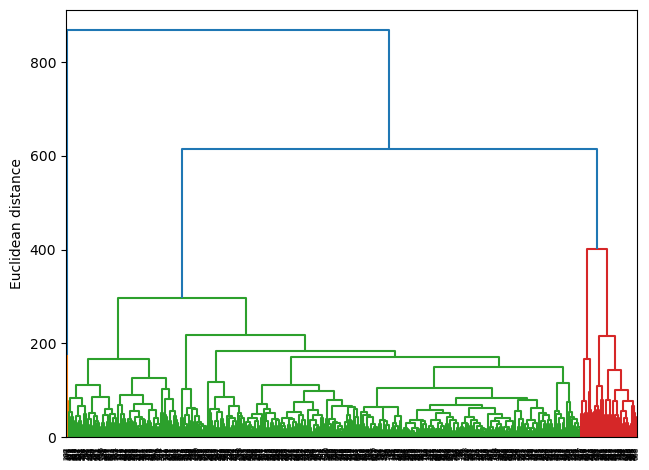

In [18]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters)
# make dendrogram black (part 2/2)
# color_threshold=np.inf
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Reorganización de los datos en el dendrograma**

Se reorganizan las filas del datarame según el orden jerárquico del dendrograma, permitiendo así visualizar similitudes entre cada fila usando un mapa de calor con un esquema de colores 'hot_r'.

/tmp/ipykernel_535570/929993888.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_535570/929993888.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


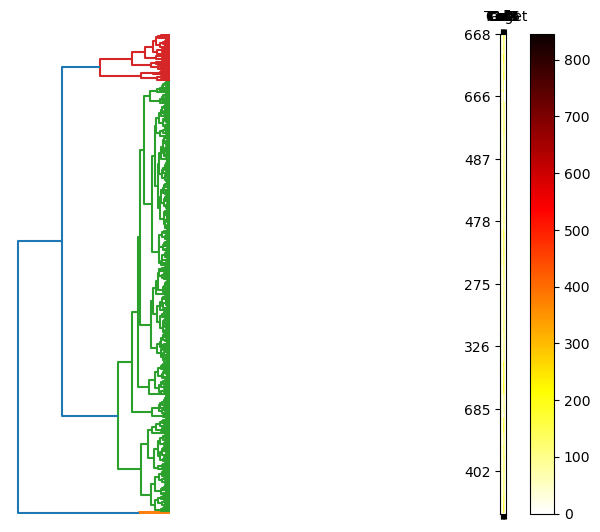

In [19]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, 
                       orientation='left')
# note: for matplotlib < v1.5.1, please use
# orientation='right'
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, 
                  interpolation='nearest', 
                  cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

**Asignación del número de clusters y sus etiquetas**

Se determina un número específico de clusters y se obtienen las etiquetas para los datos, además de identificar los clusters al cortar el dendrograma por un umbral definido por el número máximo de clusters.

In [20]:
from scipy.cluster.hierarchy import fcluster
n_clusters = 3
clusters = fcluster(row_clusters, n_clusters, criterion='maxclust')
print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3 2 1 2 2 3 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2
 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 3 2 2
 2 2 2 2 3 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 3 3
 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 2 3 2 2
 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 2 2 2 2 2 3 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 

Como se puede observar, la mayoría de los clusters están compuestos por 2 datos.

**Clustering aglomerativo**

Se utiliza la clase AgglomerativeClustering para implementar un modelo de clustering aglomerativo con las mismas configuraciones que el dendrograma para agrupar los datos y comparar los resultados.

Los labels obtenidos pueden coincidir o diferir con los resultados obtenidos en el dendrograma, lo que puede reflejar posibles variaciones en la implementación.

In [21]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 1 2 2 0 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2
 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 0 0
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 0 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 

**Estandarización de los datos**

Se estandarizan las características en X para que tengan una media de 0 y una desviación estándar de 1.

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

**Reducción dimensional**

Se reducen las dimensiones de X a dos componentes principales, lo que facilita la visualización de los datos en un espacio bidimensional.

Si los puntos de cada cluster están agrupados y separados visualmente, significa que se ha logrado una buena agrupación.

In [23]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

**Visualización de los clusters**

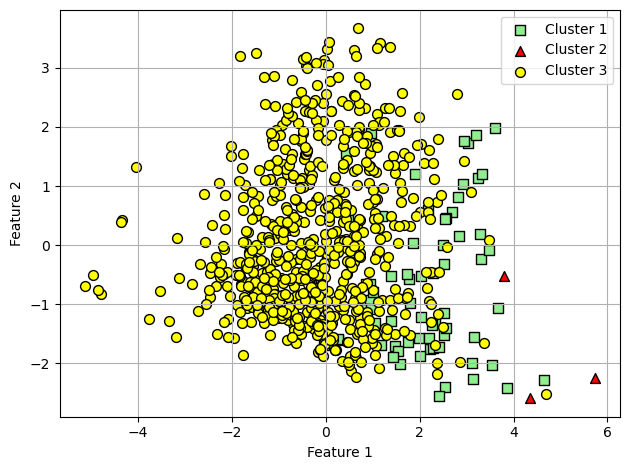

In [24]:
# PCA (Principal Component Analysis)
plt.scatter(X_pca[labels == 0, 0],
            X_pca[labels == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X_pca[labels == 1, 0],
            X_pca[labels == 1, 1],
            s=50,
            c='red',
            edgecolor='black',
            marker='^',
            label='Cluster 2')
plt.scatter(X_pca[labels == 2, 0],
            X_pca[labels == 2, 1],
            s=50,
            c='yellow',
            edgecolor='black',
            marker='o',
            label='Cluster 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()